In [1]:
# https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
%matplotlib inline

In [3]:
telecom_data = pd.read_csv('data/telecom_churn.csv')

/home/iii/opt/anaconda3/envs/ML/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


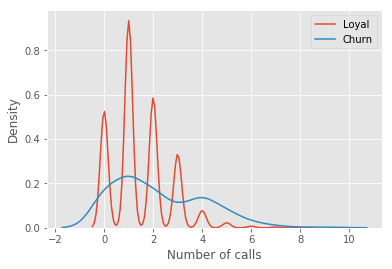

In [4]:
fig = sns.kdeplot(telecom_data[telecom_data['Churn'] == False]['Customer service calls'], label = 'Loyal')
fig = sns.kdeplot(telecom_data[telecom_data['Churn'] == True]['Customer service calls'], label = 'Churn')        
fig.set(xlabel='Number of calls', ylabel='Density')    
plt.show()

In [5]:
import numpy as np

In [9]:
def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [10]:
# Save the data about the loyal and former customers to split the dataset
loyal_calls = telecom_data[telecom_data['Churn'] == False]['Customer service calls'].values
churn_calls= telecom_data[telecom_data['Churn'] == True]['Customer service calls'].values

In [11]:
# Set the seed for reproducibility of the results
np.random.seed(0)

In [12]:
# Generate the samples using bootstrapping and calculate the mean for each of them
loyal_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(loyal_calls, 1000)]


In [13]:
churn_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(churn_calls, 1000)]

In [14]:
# Print the resulting interval estimates
print("Service calls from loyal: mean interval", stat_intervals(loyal_mean_scores, 0.05))
print("Service calls from churn: mean interval", stat_intervals(churn_mean_scores, 0.05))

Service calls from loyal: mean interval [1.4077193  1.49473684]
Service calls from churn: mean interval [2.0621118  2.39761905]


In [28]:
telecom_data[telecom_data['Churn'] == True]['Customer service calls'].mean()

2.229813664596273

In [31]:
telecom_data[telecom_data['Churn'] == False]['Customer service calls'].mean()

1.4498245614035088

In [33]:
telecom_data[telecom_data['Churn'] == False]['Customer service calls'].quantile(0.5, 'lower')

1

In [34]:
telecom_data[telecom_data['Churn'] == True]['Customer service calls'].quantile(0.5, 'lower')

2